# Reviewing Classification Problems

**GOALS**:
- Identify big idea with `LogisticRegression`
- Evaluate performance in terms of Accuracy, Precision, and Recall


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [8]:
df = pd.DataFrame(cancer.data, columns= cancer.feature_names)

In [10]:
df['target'] = cancer.target

In [21]:
df[df['target'] > 0]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.066640,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.239000,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.045680,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.189000,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.029560,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.088670,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.025620,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.048330,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.015880,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.068800,0.02564,0.3105,0.07409,1
48,12.050,14.63,78.04,449.3,0.10310,0.09092,0.065920,0.027490,0.1675,0.06043,...,20.70,89.88,582.6,0.14940,0.21560,0.305000,0.06548,0.2747,0.08301,1
49,13.490,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,0.1809,0.05718,...,31.82,99.00,698.8,0.11620,0.17110,0.228200,0.12820,0.2871,0.06917,1
50,11.760,21.60,74.72,427.9,0.08637,0.04966,0.016570,0.011150,0.1495,0.05888,...,25.72,82.98,516.5,0.10850,0.08615,0.055230,0.03715,0.2433,0.06563,1
51,13.640,16.34,87.21,571.8,0.07685,0.06059,0.018570,0.017230,0.1353,0.05953,...,23.19,96.08,656.7,0.10890,0.15820,0.105000,0.08586,0.2346,0.08025,1
52,11.940,18.24,75.71,437.6,0.08261,0.04751,0.019720,0.013490,0.1868,0.06110,...,21.33,83.67,527.2,0.11440,0.08906,0.092030,0.06296,0.2785,0.07408,1


In [25]:
df.groupby(['target']).count()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212
1,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357


In [98]:
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

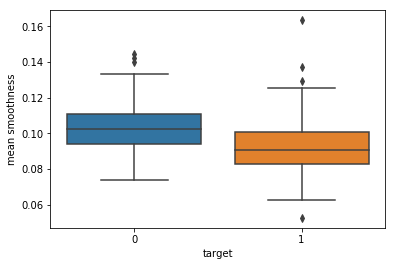

In [102]:
sns.boxplot(x = 'target', y = 'mean smoothness', data = df)

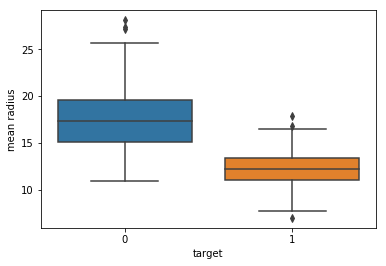

In [104]:
sns.boxplot(x = 'target', y = 'mean radius', data = df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [26]:
#We want to predict the probability that the cancer is malignant
X = df[['mean perimeter', 'mean smoothness']]
X_train, X_test, y_train, y_test = train_test_split(X, cancer.target)
clf = LogisticRegression()

In [27]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
#We want to air on the side of caution --> so we use RECALL because we want to know that there will not be a lot of false positives or false negatives
pred = clf.predict(X_test)
print(classification_report(pred, y_test))

             precision    recall  f1-score   support

          0       0.66      0.95      0.78        39
          1       0.98      0.82      0.89       104

avg / total       0.89      0.85      0.86       143



In [29]:
%%bash
pip install mglearn

distributed 1.21.8 requires msgpack, which is not installed.


In [30]:
import mglearn

Did a classification problem and the below is the OUTCOME
Logistic regression FORMS a linear decision boundary --> it draws a straight line boundary between two classifications

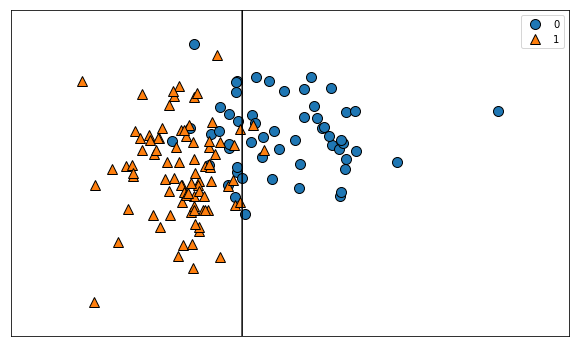

In [38]:
#X, y = mglearn.datasets.make_forge()
clf = clf.fit(X_train, y_train)
plt.figure(figsize = (10, 6))
mglearn.plots.plot_2d_separator(clf, np.array(X_test))
mglearn.discrete_scatter(X_test['mean perimeter'], X_test['mean smoothness'], y_test)
plt.ylim(min(X_test['mean smoothness'])-.01, max(X_test['mean smoothness'])+.01)
plt.legend()

Precision for 0 is False Positive
For Precision for 0: The things that are classified as 0 that are 0 are the true positive on the right hand side of the line; True n
For Recall looking at 0: on the left hand side; false negative false identified as being

In [32]:
print(classification_report(clf.predict(X_test), y_test))

             precision    recall  f1-score   support

          0       0.66      0.95      0.78        39
          1       0.98      0.82      0.89       104

avg / total       0.89      0.85      0.86       143



In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(clf.predict(X_test), y_test)

array([[37,  2],
       [19, 85]])

### Problem

Using two other pairs of inputs, see if you can improve upon the recall score for the 1 category.  Plot the decision boundary and classes as demonstrated above.  Pay close attention to identifying the points that are contributing to differences in precision and recall.

             precision    recall  f1-score   support

          0       0.76      1.00      0.86        41
          1       1.00      0.87      0.93       102

avg / total       0.93      0.91      0.91       143



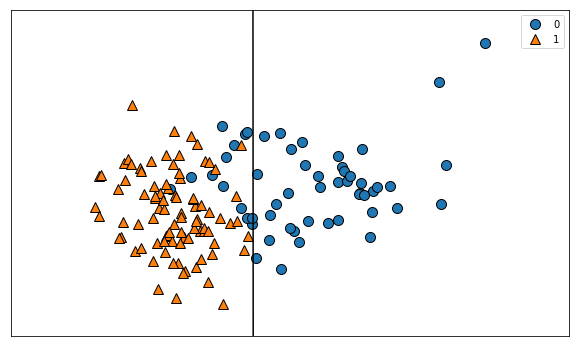

In [50]:
X = df[['mean perimeter', 'mean smoothness']]
X_train, X_test, y_train, y_test = train_test_split(X, cancer.target)
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(pred, y_test))
clf = clf.fit(X_train, y_train)
plt.figure(figsize = (10, 6))
mglearn.plots.plot_2d_separator(clf, np.array(X_test))
mglearn.discrete_scatter(X_test['mean perimeter'], X_test['mean smoothness'], y_test)
plt.ylim(min(X_test['mean smoothness'])-.01, max(X_test['mean smoothness'])+.01)
plt.legend()

### Problem

Using the PIMA diabetes dataset, your goal is to build a classifier that is:

1. Accurate
2. Appropriate

For information about the data, please see the brief description of the variables here: https://www.kaggle.com/uciml/pima-indians-diabetes-database/home 

Your results should include a clear framing of the question, brief description of the approach you used, and suggestions as to what else might be done to effect a better model.

- Here we are interested in the RECALL

- When we are looking at the results of the logistic regression, we care about doing precision and/or recall on the TEST set!

In [86]:
pima = pd.read_csv('data/pima_diabetes.csv', index_col=0)

In [77]:
pima.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [78]:
pima.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [59]:
pima.groupby(['preg'])['preg'].count().head()

preg
0    111
1    135
2    103
3     75
4     68
Name: preg, dtype: int64

In [62]:
dummy = pd.get_dummies?

In [76]:
y = pima['class']
X = pima[['preg','age']]
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(pred, y_test))
clf = clf.fit(X_train, y_train)
print(clf)

             precision    recall  f1-score   support

          0       0.83      0.61      0.71       155
          1       0.23      0.49      0.31        37

avg / total       0.72      0.59      0.63       192

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [92]:
y = pima['class']
X = pima[['pres','pedi', 'mass', 'age']]
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(pred, y_test))
clf = clf.fit(X_train, y_train)
print(clf)

             precision    recall  f1-score   support

          0       0.87      0.72      0.79       149
          1       0.39      0.63      0.48        43

avg / total       0.76      0.70      0.72       192

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [91]:
y = pima['class']
X = pima[['skin','pedi']]
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
train_pred = classification_report(y_train, clf.predict(X_train))
test_pred = classification_report(y_test, clf.predict(X_test))
#print(classification_report(test_pred, y_test))
clf = clf.fit(X_train, y_train)
print(clf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [83]:
from sklearn.metrics import accuracy_score

In [85]:
accuracy_score(y_test, clf.predict(X_test))

0.6614583333333334